## 5장. 영상 분할(Image segmentation)



영상 분할이란 주어진 영상을 의미 있는 영역(region)으로 나누는 작업.

<img src="./resource/area_intro.PNG" width="500" height="600">


상자, 파프리카, 가격표는 사람에게 의미있는 물체다.

그래서, 인지과정에서 영상을 영역 단위로 분할하고, 학습을 통해 이미 알고있는 물체와 매칭한다.

하지만, 컴퓨터는 영역 단위로 분할후, 물체를 인지한다.

특징점과 다른점은. 특징점은 그 자체로 의미가 없고, 매칭이 필요하다.

하지만, 영역은 그자체로 물체가 될 수 있다.

## 5-2. 전통적인 방법.

자연영상에서는 성능이 낮지만, <공장 자동화, 문서인식> 등과 같이 영상 획득 조건이 있는 상황에서는 사용할 수 있는 방법들.

### 5-2-1. 임계화를 이용한 영역분할

어두운 배경에 밝은 물체가 있으면 이진화를 사용해 물체영역과 배경 영역을 분할할 수 있다.

깨끗한 배경과 균일한 밝기의 물체가 있는 상황에는 <span style="color:blue">'otsu 알고리즘'</span>이 효과적인 방법이다.

<img src="./resource/otsu1.PNG" width="600" height="600">

삼진화가 필요한 영상에서는, 이중 임계값 (t1,t2)로 확장시켜야한다.

<img src="./resource/otsu2.PNG" width="500" height="600">

각 영역의 평균-global평균 으로 

t1과 t2사이의 분산을 계산한 식으로, 분산이 큰 t1과 t2를 찾는것. 이를 이중 임계값 otsu 알고리즘이라 한다.

<img src="./resource/otsu3.PNG" width="500" height="600">

삼진화 하여, 각 영역의 명암값은 평균값으로 대체한다.

---
하지만, 지금까지는 전역적인 방법으로 임계값을 설정함.

<img src="./resource/otsu4.PNG" width="500" height="600">

효모영상을 임계화했을때, 내부가 잘 분할 되지않았음.

지역의 상황에 따라 적응적으로 결정하는 adaptive thresholding 방법 사용.

<img src="./resource/otsu5.PNG" width="400" height="500">

달라진 점은, 임계값 t가 아니라, t(j,i)로 (j,i)의 이웃(원형 또는 정방형)을 보고 임계값이 결정된다.

그래서 t함수는 영상의 특성에 달라진다.

In [ ]:
# ex) 다중 임계 otsu

### 5-2-2. 군집화를 이용한 영역 분할

<img src="./resource/kmeans1.PNG" width="400" height="500">


rgb 화소를 3차원 컬러공간에 매핑하자. 3차원 공간의 점들은 색깔이 비슷할수록 가까이 위치한다. (이미지라서 rgb이고, 점이면 xy좌표를 넣는다.)

가까이 있는 화소들을 군집으로 모으는것이 clustering 이다.

<img src="./resource/kmeans2.PNG" width="500" height="600">

처음 k개의 점을 군집 중심으로 초기화함.(초기화 방법에 따라 결과도 달라짐.)

그후, n개의 점을 가장 가까운 군집에 배치하고, 군집마다 평균을 구하여 중심을 바꿈.

<img src="./resource/kmeans3.PNG" width="400" height="500">


뒤의 집이나 산이 꽃과 같이 분류가 됨. 화소간의 거리를 생각하지 않았기 때문.

그래프방법과 mean-shift가 이를 발전시킴.

---
```

criteria 
- cv2.TERM_CRITERIA_EPS: epsilon으로 주어진 정확도를 만족하면 반복을 멈춘다.

- cv2.TERM_CRITERIA_MAX_ITER: 정확도와 상관없이 미리 정해진 반복 횟수를 다 채우면 알고리즘을 멈춘다.

- cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER : 위 둘 중 한 조건이 만족되면 멈춘다. 여기에서 max_iter=10, epsilon=1.0


kmeans 
- k: 클러스터수
- attempts: 10번의 독립적인 실행 분류
- cv2.KMEANS_RANDOM_CENTERS : 초기점을 랜덤으로

결과
- ret: 밀집도(compactness)이다. 이것은 각 클러스터의 중심으로부터 거리제곱의 합이다. 

-labels: 각 점이 어느 클러스터에 속하게 되었는지 표시한다(0,1,2,..)

-centers: 클러스터의 중심 좌표를 리턴한다. K개의 데이터를 가진다. 
(이미지에서는 화소값이 리턴됨. xy가 아닌 rgb를 넣었으니)

```

center 화소값 [[185.25285  189.93256  139.16666 ]
 [ 66.91187   78.65144   70.67243 ]
 [116.648254 130.76826   85.714264]]
center 화소값 [[ 23.412073  24.25409   30.322037]
 [185.34833  190.03787  139.30324 ]
 [118.22568  132.68007   85.93615 ]
 [ 73.88992   86.87979   76.423645]]
center 화소값 [[117.5018   132.14536   85.62688 ]
 [175.58853  181.58408  124.48395 ]
 [ 23.333784  24.187933  30.275984]
 [ 73.7691    86.76858   76.40785 ]
 [239.9249   235.71873  223.52159 ]]
center 화소값 [[ 73.75951   86.751434  76.39944 ]
 [169.26952  177.38412  126.8653  ]
 [117.4045   132.07835   85.438675]
 [ 23.237917  24.095133  30.190775]
 [234.21758  220.40247  107.27621 ]
 [239.6511   236.07011  230.57976 ]]
center 화소값 [[128.74158  142.45123   92.59324 ]
 [ 72.1887    85.50721   76.0507  ]
 [ 22.801205  23.711187  29.814974]
 [239.67442  235.92982  230.26479 ]
 [169.83215  178.14911  127.71483 ]
 [106.56727  120.64964   79.89053 ]
 [233.96356  220.4758   105.62436 ]]


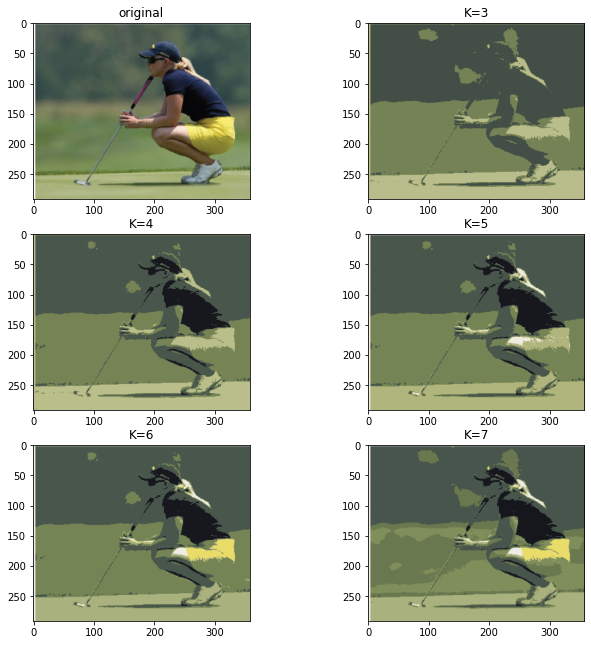

In [30]:
# ex) k-means segmentation
#https://gmnam.tistory.com/168
import cv2
import numpy as np
from matplotlib import pyplot as plt

original_image = cv2.imread("../data/mean-shift-data.png")
img = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)# rgb 순으로 바꿔서 진행
vectorized = img.reshape((-1,3))
#1행으로 바꿔버리기
vectorized = np.float32((vectorized))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
attempts = 10


fig =plt.figure(figsize=(11,11))
plt.subplot(321),plt.title("original")# 3행 2열중 1번째
plt.imshow(img)

count=1
for k in [3,4,5,6,7]:
    count=count+1
    ret,label,center = cv2.kmeans(vectorized,
                                  k,
                                  None,
                                  criteria,attempts,
                                  cv2.KMEANS_PP_CENTERS)
    #KMEANS_PP_CENTERS : kmeans++ 방식을 이용
    print("center 화소값",center)
    center = np.uint8(center)
    res= center[label.flatten()] #center 화소를 각 라벨에 맞게 대입.
    result_image=res.reshape((img.shape))
    plt.subplot(320+count),plt.title("K="+str(k))# 3행 2열중 1번째
    plt.imshow(result_image)
    
plt.show()




## 5-3. 그래프 방법

영상 f를 그래프로 표현한 후, 분할에 필요한 정보를 찾아내는 방법.

G=(V,E)로 정의되고, 노드 V는 한 화소가 될수도 있고, 과분할(다른 segmentation 기법)하여 얻은 자잘한 노드(SUPER PIXEL)이 될 수도 있다.

방향이 없는 그래프이고, E (엣지)는 가중치 W_pq를 가진다.

이때 W_pq는 유사도(얼마나 비슷한가) 또는 거리(얼마나 다른가)로 나타낼 수 있다.

##### 용어 정의
---

- f(Vp) : 노드 V_p 의 명암값.

- x(Vp) : 노드 V_p 의 화소의 위치

- 이웃 : 에지를 가지는 화소쌍. 거리가 r( 여기서는 화소 x,y좌표 거리) 이내 이면 에지를 가진다.

<img src="./resource/graph_intro1.PNG" width="500" height="600">

<img src="./resource/graph_intro2.PNG" width="500" height="600">

r=1 주변 4방향 화소만 에지를 가지는 그래프. 거리 d를 가중치 W로 채택. (서로 다른 정도를 가중치로 채택.)

예를들어, V6, V7 간에 W는 3.  V7, V8간에는 W는 1.

- 연결요소(영역)를 만드는 방법
---

```
유사도가 높은 노드쌍이 같은 영역에 속하고

유사도가 낮은 노드쌍은 다른 영역이 되야한다.

그러면, 유사도가 낮은 에지를 중심으로 분할선을 주면된다.

W(6,7)=3, W(7,8)=1 이므로 W(6,7)이 분할선이될 가능성이 높은 것.

```

##### 분할선의 전역 최적해
---

지역적으로는 최적이라도, 전역적으로는 판단하면 분할선이 안될 수도 있다.

최적화 문제를 해결하기위해 목적함수와 그것을 수행할 알고리즘이 필요하다.

```
1. 어떤 분할의 좋은 정도를 측정하는 목적함수
2. 목적 함수를 최대화 또는 최소화하는 최적해를 찾는 효율적인 탐색 알고리즘

```




### 5-3-1. 최소 신장트리
이 알고리즘은 신장트리(spanning tree)를 이용하여 최적의 분할을 찾아낸다.

- 신장트리 : 모든 노드를 포함하고, edge의 수가 가장 작은 트리. (edge 수 : 노드수 -1 )

- 최소신장트리(MST) : 신장트리 중, edge 가중치 합이 가장 낮은 트리.

- kruskal 알고리즘, prim 알고리즘으로 구현

- edge 가중치가 거리(d)인 그래프로 표현.

<img src="./resource/graph_intro1.PNG" width="500" height="600">


연결요소 C={v1,v6,v7,v11,v12} 일때, 최소신장트리는 MST(C)={(v1,v6), (v6,v11), (v11,v12), (v12,v7)}

검은색 표시된 부분 그래프의 최소 신장트리는 빨간 edge.

만약, 거리 가중치로 MST가 연결요소 C를 분할했다고 가정하면.

```
분할이 잘되었는지 어떻게 판단할까?

새로운 노드를 추가해야한다면 어떤 노드(화소)를 선택하는것이 좋을까?

```
---
#### 분할이 만족해야하는 성질. ( 목적함수 )
---

1. 연결요소의 균일한 정도

<img src="./resource/mst2.PNG" width="500" height="600">

최소 신장트리의 에지중 가장 큰 가중치 선택. ex) intra(C) = 2

##### 의미

V6과 V7은 명암값이 3차이라서, 둘만 보면 같은 영역이 아닌데,

intra(C)는 2이기에 같은 영역일 확률이 높다.

##### 노드를 추가할 때

V8을 추가하는 상황에서, intra(c)=2 그대로 이니, 택하는것이 유리하다.

<br>

2. 두 연결요소간의 비교

<img src="./resource/mst3.PNG" width="500" height="600">


##### mult_intra
이 둘이 얼마나 균일한지 측정. 둘 중 하나라도 균일하지 않으면 값이 커진다.

##### diff
두 영역의 화소의 차이.

<br>

3. 판별식
연결요소가 잘 분할되었는지 판별하는 식.

<img src="./resource/mst4.PNG" width="500" height="600">

mult_intra 가 작아서 균일하고, diff 가 크면 잘 분할 되어, 참.

---
#### 성질을 만족하며, 분할하는 방법. (알고리즘)
---

Kruskal 알고리즘(greedy)로 구현됨.

<img src="./resource/mst5.PNG" width="500" height="700">

<img src="./resource/mst6.PNG" width="500" height="600">

결과, 잎 부분이. 전역최적화로인해 세분화 되지않음.



##### 컬러 영상의 경우.
거리 식을 3개의 차원을 가진 벡터의크기로 바꾼다.

또는 채널마다 따로 분할하여 합친다.

<img src="./resource/mst7.PNG" width="500" height="600">

In [1]:
#ex) 최소신장트리 방법

---
### 5-3-2. 정규화 절단
분할된 연결요소들을 잘라서, 최적화하는 방법.

### Wu의 방법.
---

<img src="./resource/cut1.PNG" width="500" height="600">

그래프를 구성시, 거리대신 <span style="color:blue">유사도</span>를 edge 가중치로 사용한다.

왼쪽은 유사도를 기준으로 분할하는 과정이고, 오른쪽은 인접행렬( 가중치 행렬 )이다.

> 유사도를 기준으로, 분할하려면 어떻게 해야하는가?

- cut함수 ( 목적함수 )

<img src="./resource/cut2.PNG" width="400" height="500">

Wu는 분할 결과로 생성되는 두 연결요소가 다를수록 좋다는 원칙에 따라,

유사도의 합이 낮은 edge들을 분할함.


예를들어, 1번과 2번중 2번을 자르게됨. 하지만, 1번으로 분할하는게 더 맞다.

연결요소가 세밀하게 분할된다는 단점이 생김.


### Shi의 방법 (정규화 절단)
---
Shi는 그래서, cut함수를 정규화 하는 방법을 택함.

<img src="./resource/cut3.PNG" width="400" height="500">

assoc 함수는 분할전 C와 분할 후 C_i의 가중치합.

하지만, 현실 이미지에서는 수천~수만의 연결요소가 생긴다.

근사하는 방법.

<img src="./resource/cut4.PNG" width="400" height="500">

(고유벡터 행렬 구하는식)

W 가중치 행렬에서, A라는 고유벡터 행렬을 구하면 . 고유값이 가장낮은 벡터가 제일 가중치가 낮다고 생각할 수 있다.

Shi 두 번째로 작은 고유벡터를 기준으로, 분할함. (이때 M x N 차원의 벡터가 되는데, 각 화소가 요소이다. 화소를 보고 결정한다고함.)

(어떻게 분할하나?)

<img src="./resource/cut5.PNG" width="600" height="700">

이때 두번째 행, W 구할 때 유사도의 식은

<img src="./resource/cut6.PNG" width="600" height="700">

이 유사도 식은 특징과 거리를 동시에 사용한다.

화소값 f가 크게 달라도, 거리 x가 가까우면 연결요소가 될 수도 있고,

거리가 멀어도 f가 비슷해서, 연결요소가 될 수 있다.

<img src="./resource/cut7.PNG" width="500" height="600">
